# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll then also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

You will be able to:
* Use ANOVA for testing multiple pairwise comparisons
* Understand and explain the methodology behind ANOVA tests

## Loading the Data

Start by loading in the data stored in the file **ToothGrowth.csv**.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Your code here
df = pd.read_csv("./ToothGrowth.csv")
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
len     60 non-null float64
supp    60 non-null object
dose    60 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [9]:
df["supp"].value_counts()

OJ    30
VC    30
Name: supp, dtype: int64

## Generating the ANOVA Table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage 

In [10]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'len ~ C(supp) + C(dose)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


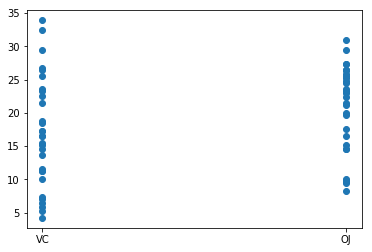

In [29]:
plt.scatter(df["supp"], df["len"]);

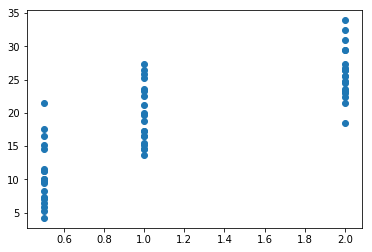

In [30]:
plt.scatter(df["dose"], df["len"]);

## Reading the Table

Make a brief comment regarding the statistics regarding the effect of supplement and dosage on tooth length.

In [ ]:
# Your comment here
# Looking at the PR(>F): Both dose and supplement type are impactful. 
#                         At first glance, dosage seems to be the more impactful of the two.

## Comparing to T-Tests

Now that you've gotten a brief chance to interact with ANOVA, its interesting to compare the results to those from the t-tests you were just working with. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterwards, you'll conduct a t-test to compare the tooth length of these two different samples.

In [18]:
#Your code here
oj_lengths = df[df.supp=='OJ']['len']
vc_lengths = df[df.supp=='VC']['len']

In [11]:
#Your code here
OJ_supplements = df.loc[df["supp"] == "OJ"]
OJ_supplements.head()

,len,supp,dose
30,15.2,OJ,0.5
31,21.5,OJ,0.5
32,17.6,OJ,0.5
33,9.7,OJ,0.5
34,14.5,OJ,0.5


In [16]:
OJ_supplements.describe()

,len,dose
count,30.000000,30.000000
mean,20.663333,1.166667
std,6.605561,0.634270
min,8.200000,0.500000
25%,15.525000,0.500000
50%,22.700000,1.000000
75%,25.725000,2.000000
max,30.900000,2.000000


In [14]:
VC_supplements = df.loc[df["supp"] == "VC"]
VC_supplements.head()
print(VC_supplements.shape)

(30, 3)


In [17]:
VC_supplements.describe()

,len,dose
count,30.000000,30.000000
mean,16.963333,1.166667
std,8.266029,0.634270
min,4.200000,0.500000
25%,11.200000,0.500000
50%,16.500000,1.000000
75%,23.100000,2.000000
max,33.900000,2.000000


In [20]:
vc_supplement_len = VC_supplements["len"]
vc_supplement_len

0      4.2
1     11.5
2      7.3
3      5.8
4      6.4
5     10.0
6     11.2
7     11.2
8      5.2
9      7.0
10    16.5
11    16.5
12    15.2
13    17.3
14    22.5
15    17.3
16    13.6
17    14.5
18    18.8
19    15.5
20    23.6
21    18.5
22    33.9
23    25.5
24    26.4
25    32.5
26    26.7
27    21.5
28    23.3
29    29.5
Name: len, dtype: float64

In [21]:
oj_supplement_len = OJ_supplements["len"]
oj_supplement_len

30    15.2
31    21.5
32    17.6
33     9.7
34    14.5
35    10.0
36     8.2
37     9.4
38    16.5
39     9.7
40    19.7
41    23.3
42    23.6
43    26.4
44    20.0
45    25.2
46    25.8
47    21.2
48    14.5
49    27.3
50    25.5
51    26.4
52    22.4
53    24.5
54    24.8
55    30.9
56    26.4
57    27.3
58    29.4
59    23.0
Name: len, dtype: float64

Now compare a t-test between these two groups and print the associated two-sided p-value.

In [24]:
#Your code here; calculate the 2-sided p-value for a t-test comparing the two supplement groups.
from scipy import stats

p_value = stats.ttest_ind(oj_supplement_len, vc_supplement_len, equal_var=False)[1]
print(f"p_value = {p_value}, {round(p_value*100,1)}% probability")

p_value = 0.06063450788093387, 6.1% probability


## A 2-Category ANOVA F-Test is Equivalent to a 2-Tailed t-Test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-Test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [ ]:
#Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.
#Compare the p-value to that of the t-test above. 
#They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)

In [31]:
formula = 'len ~ C(supp)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

               sum_sq    df         F    PR(>F)
C(supp)    205.350000   1.0  3.668253  0.060393
Residual  3246.859333  58.0       NaN       NaN


## Generating Multiple T-Tests

While the 2-category ANOVA test is identical to a 2-tailed t-Test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [36]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    print(group_name)
    data = group[1]
    print(data)
    #print(group_name)

('OJ', 0.5)
30    15.2
31    21.5
32    17.6
33     9.7
34    14.5
35    10.0
36     8.2
37     9.4
38    16.5
39     9.7
Name: len, dtype: float64
('OJ', 1.0)
40    19.7
41    23.3
42    23.6
43    26.4
44    20.0
45    25.2
46    25.8
47    21.2
48    14.5
49    27.3
Name: len, dtype: float64
('OJ', 2.0)
50    25.5
51    26.4
52    22.4
53    24.5
54    24.8
55    30.9
56    26.4
57    27.3
58    29.4
59    23.0
Name: len, dtype: float64
('VC', 0.5)
0     4.2
1    11.5
2     7.3
3     5.8
4     6.4
5    10.0
6    11.2
7    11.2
8     5.2
9     7.0
Name: len, dtype: float64
('VC', 1.0)
10    16.5
11    16.5
12    15.2
13    17.3
14    22.5
15    17.3
16    13.6
17    14.5
18    18.8
19    15.5
Name: len, dtype: float64
('VC', 2.0)
20    23.6
21    18.5
22    33.9
23    25.5
24    26.4
25    32.5
26    26.7
27    21.5
28    23.3
29    29.5
Name: len, dtype: float64


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2 sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [ ]:
#Your code here; reuse your t-test code above to calculate the p-value for a 2-sided t-test
#for all combinations of the supplement-dose groups listed above. 
#(Since there isn't a control group, compare each group to every other group.)

In [37]:
from itertools import combinations

groups = [group[0] for group in df.groupby(['supp', 'dose'])['len']]
combos = combinations(groups, 2)
for combo in combos:
    supp1 = combo[0][0]
    dose1 = combo[0][1]
    supp2 = combo[1][0]
    dose2 = combo[1][1]
    sample1 = df[(df.supp == supp1) & (df.dose == dose1)]['len']
    sample2 = df[(df.supp == supp2) & (df.dose == dose2)]['len']
    p = stats.ttest_ind(sample1, sample2, equal_var=False)[1]
    print(combo, p)

(('OJ', 0.5), ('OJ', 1.0)) 8.784919055161479e-05
(('OJ', 0.5), ('OJ', 2.0)) 1.3237838776972294e-06
(('OJ', 0.5), ('VC', 0.5)) 0.006358606764096813
(('OJ', 0.5), ('VC', 1.0)) 0.04601033257637553
(('OJ', 0.5), ('VC', 2.0)) 7.196253524006043e-06
(('OJ', 1.0), ('OJ', 2.0)) 0.039195142046244004
(('OJ', 1.0), ('VC', 0.5)) 3.6552067303259103e-08
(('OJ', 1.0), ('VC', 1.0)) 0.001038375872299884
(('OJ', 1.0), ('VC', 2.0)) 0.09652612338267014
(('OJ', 2.0), ('VC', 0.5)) 1.3621396478988818e-11
(('OJ', 2.0), ('VC', 1.0)) 2.3610742020468435e-07
(('OJ', 2.0), ('VC', 2.0)) 0.9638515887233756
(('VC', 0.5), ('VC', 1.0)) 6.811017702865016e-07
(('VC', 0.5), ('VC', 2.0)) 4.6815774144921145e-08
(('VC', 1.0), ('VC', 2.0)) 9.155603056638692e-05


## Summary

In this lesson, you examined the ANOVA technique to generalize A/B testing methods to multiple groups and factors.